# Series и DataFrame

## Series

**Series** — это одномерный массив, который может хранить данные любого типа (например, числа, строки, объекты). Важной особенностью Series является то, что каждый элемент имеет уникальный индекс, который можно использовать для доступа к данным.  

**Основные характеристики Series**:  
* **Индекс**: Каждый элемент Series имеет свой индекс (по умолчанию это целые числа от 0 до n-1, где n — количество элементов).  
* **Тип данных**: Все элементы в Series имеют одинаковый тип данных.

In [44]:
# импортируем библиотеку 
import pandas as pd

# создадим первый Series
s_1 = pd.Series([10, 20, 30, 40, 50])

print(s_1)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [45]:
# давайте попробуем создать серию с разными типами данных
s_test_1 = pd.Series([10, 2.5, 'Hello', True])
print(f'{s_test_1}')

# обратите внимание, если в серии есть текстовые данные тип данных меняется на object

s_test_2 = pd.Series([10, 20, 30, 4.5, -2.17])
print(f'\n{s_test_2}')
# то же касается и десятичных цисел, если в серии есть то тип данных меняется на float

0       10
1      2.5
2    Hello
3     True
dtype: object

0    10.00
1    20.00
2    30.00
3     4.50
4    -2.17
dtype: float64


### Индексация

In [46]:
# индексы можно также задать при создании серии
# По умолчанию серии присваивается целочисленная индексация с нуля, 
# но ее можно изменить с помощью параметра index.
s_2 = pd.Series([1, 3, 5, 7, 9],
                index=['a', 'b', 'c', 'd', 'e'])

print(s_2)

a    1
b    3
c    5
d    7
e    9
dtype: int64


### Доступ по индексу

In [47]:
# вернем последние два элемента серии
print(f'Исходная серия:\n{s_1}')
print(f'\nВернем два элемента с конца:\n{s_1[-2:]}')
print(f'\nЛогическая индексация:\n{s_1[(s_1 > 10) & (s_1 < 50)]}')
print(f'\nЛогическая индексация:\n{s_1[s_1 >= 30]}')

Исходная серия:
0    10
1    20
2    30
3    40
4    50
dtype: int64

Вернем два элемента с конца:
3    40
4    50
dtype: int64

Логическая индексация:
1    20
2    30
3    40
dtype: int64

Логическая индексация:
2    30
3    40
4    50
dtype: int64


In [48]:
# вариант с заданной индексацией
print(f'Исходная серия:\n{s_2}')
print(f'\nВернем элементы с b по d:\n{s_2['b':'d']}')
print(f'\nИли просто вернем элемент с индексом е:\n{s_2['e']}')

Исходная серия:
a    1
b    3
c    5
d    7
e    9
dtype: int64

Вернем элементы с b по d:
b    3
c    5
d    7
dtype: int64

Или просто вернем элемент с индексом е:
9


In [49]:
# проверим работы методов на series
# создадим серию с повторами значений
s_3 = pd.Series(['Red', 'Red', 'Blue', 'White', 'Black', 'Black']) 
print(f'Исходный вид Series s_3:\n{s_3}')

# воспользуемся методом is_unique, проверяющим на наличие дубликатов

if s_3.is_unique == False:
    print(f'\nВ series есть дубликаты')
else:
    print(f'\nВсе значения уникальны')

Исходный вид Series s_3:
0      Red
1      Red
2     Blue
3    White
4    Black
5    Black
dtype: object

В series есть дубликаты


## DataFrame

DataFrame в библиотеке Pandas — это основной объект, который используется для хранения и обработки табличных данных. Он представляет собой двумерную структуру данных, где данные организованы в строки и столбцы, аналогично таблицам в базах данных или листам в Excel.  

**Основные характеристики DataFrame**:  
* **Столбцы**: Каждый столбец в DataFrame может содержать данные одного типа (например, числовые значения, строки, даты и т.д.), но типы данных в разных столбцах могут различаться.  
* **Индексы**: У DataFrame есть два типа индексов:
    * **Строковые индексы**: Индексация строк по умолчанию начинается с 0 и идет до n-1, где n — количество строк. Но можно задавать свои индексы, например, названия строк или временные метки.  
    * **Столбцовые индексы**: Названия столбцов также могут быть изменены на пользовательские значения.  
* **Гибкость**: DataFrame предоставляет мощные методы для работы с данными, включая фильтрацию, группировку, агрегирование, объединение и многое другое.

### Создание DataFrame

DataFrame можно создать из различных источников данных, таких как списки, словари, файлы CSV, Excel и других форматов.

In [50]:
# разберем пример создания DataFrame из словаря

# определяем словарь
dic_1 = {
    'Имя' : ['Антон', 'Павел', 'Анна'],
    'Профессия' : ['Аналитик', 'Плотник', 'Тренер'],
    'Рост' : [180, 175, 165]
}

df_1 = pd.DataFrame(dic_1)

print(df_1)

     Имя Профессия  Рост
0  Антон  Аналитик   180
1  Павел   Плотник   175
2   Анна    Тренер   165


In [51]:
# из двумерного массива NumPy

# импортируем библиотеку 
import numpy as np

# определим двумерный массив
arr_1 = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15]
])

# используем массив numpy для создания DataFrame
df_2 = pd.DataFrame(arr_1)

print(df_2)

    0   1   2   3   4
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15


### Изучаем DataFrame

In [52]:
# прочитаем csv и создадим DataFrame
raw_data = pd.read_csv('datasets/sales.csv')

# взглянем на полученный DataFrame
display(raw_data.head())

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285


In [53]:
# изучим DataFrame

# метод .shape возвращает количество строк и столбцов
print(f'В DataFrame {raw_data.shape[0]} строк и {raw_data.shape[1]} столбцов')

# метод .size возвращает переменоженное количество строк и столбцо
print(f'\nВ DataFrame {raw_data.size} ячеек')

# функция len() вернет количество строк в DataFrame
print(f'\nВ DataFrame {len(raw_data)} строк')

В DataFrame 1000 строк и 7 столбцов

В DataFrame 7000 ячеек

В DataFrame 1000 строк


In [54]:
# подробную информацию о DataFrame можем получить используя метод .info
raw_data.info()
# 1000 вхождений или строк с индексом от 0 до 999
# 7 полей
# перечислены названия полей и типы данных в полях

# названия полей и типы данных можно также получить используя метод .dtypes
print(f'\nНазвания полей и типы данных:\n{raw_data.dtypes}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_code      1000 non-null   int64  
 1   product_group     1000 non-null   object 
 2   stock_qty         1000 non-null   int64  
 3   cost              1000 non-null   float64
 4   price             1000 non-null   float64
 5   last_week_sales   1000 non-null   int64  
 6   last_month_sales  1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB

Названия полей и типы данных:
product_code          int64
product_group        object
stock_qty             int64
cost                float64
price               float64
last_week_sales       int64
last_month_sales      int64
dtype: object


### Изменение типа данных

In [55]:
# для изменения типа данных используем метод .astype()

raw_data['stock_qty'] = raw_data['stock_qty'].astype('float') # изменим тип данных
raw_data['stock_qty'].dtypes # убедимся, что тип данных изменен


dtype('float64')

In [56]:
# используем метод astype но в этот раз со словарем, чтобы передать несколько колонок

# меняем типы данных используя словарь
raw_data = raw_data.astype ({
    'last_week_sales' : 'float',
    'last_month_sales' : 'float'
})

# проверяем
raw_data[['last_week_sales', 'last_month_sales']].dtypes

last_week_sales     float64
last_month_sales    float64
dtype: object

### nunique() / unique()

In [57]:
# проверим уникальные значения в поле с категорией товара и сосчитаем их количество
 
print(f'В DF представлены такие категории:\n{raw_data['product_group'].unique()}') # 6 категорий

print(f'\n{raw_data['product_group'].nunique()} уникальных категорий.') # 6 категорий


В DF представлены такие категории:
['PG2' 'PG4' 'PG6' 'PG5' 'PG3' 'PG1']

6 уникальных категорий.


### value_counts

In [58]:
# теперь посмотрим, сколько строк принадлежит к каждой из категорий
raw_data['product_group'].value_counts()

product_group
PG4    349
PG5    255
PG6    243
PG2     75
PG3     39
PG1     39
Name: count, dtype: int64

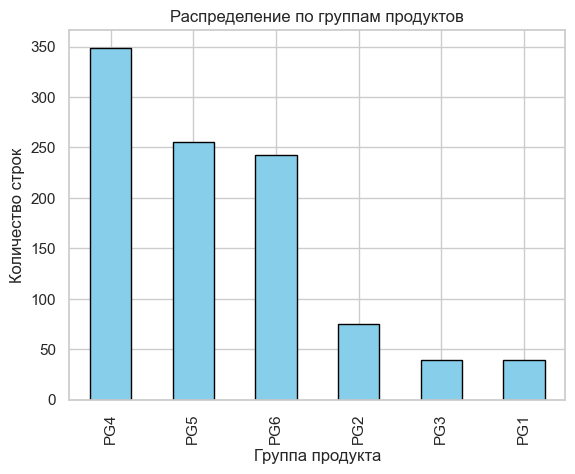

In [59]:
# взглянем на данные

# импортируем библиотеку
import matplotlib.pyplot as plt

# создаем переменную для визуализации
data_for_vis = raw_data['product_group'].value_counts()

# определяем параметры барчарта
data_for_vis.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

# добавляем подписи
plt.title('Распределение по группам продуктов')
plt.xlabel('Группа продукта')
plt.ylabel('Количество строк')

# выводим на экран
plt.show()

## Меры центрально тенденции

In [60]:
print(raw_data['cost'].info())
print(raw_data.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: cost
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_code      1000 non-null   int64  
 1   product_group     1000 non-null   object 
 2   stock_qty         1000 non-null   float64
 3   cost              1000 non-null   float64
 4   price             1000 non-null   float64
 5   last_week_sales   1000 non-null   float64
 6   last_month_sales  1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB
None


### Среднее

In [61]:
# давайте найдем среднюю цену по всему датафрейму

print(f'Максимальная цена: {raw_data['cost'].max()}')
print(f'Минимальная цена: {raw_data['cost'].min()}')
print(f'Средняя цена: {round(raw_data['cost'].mean(),2)}')

Максимальная цена: 1243.0
Минимальная цена: 0.54
Средняя цена: 45.95


In [62]:
# давайте найдем среднюю цену внутри групп товаров

# сгруппируем данные
group_data_1 = round(raw_data.groupby('product_group')['cost'].agg(['max', 'min', 'mean']),2)

# выведем результат на экран
display(group_data_1)

,max,min,mean
product_group,,,
PG1,1243.00,1.57,205.54
PG2,869.69,0.83,82.01
PG3,437.21,2.75,57.27
PG4,621.50,0.57,17.89
PG5,700.14,1.32,68.44
PG6,632.50,0.54,24.10


### Мода


In [79]:
# мода - наиболее часто встречающееся значение в наборе данных.

print(f'Наиболее часто встречающая группа в наборе данных: {raw_data['product_group'].mode()[0]}')

# сгруппируем по группе товаров и посчитаем количество строк, чтобы убедиться, что мода определена верно
print(raw_data.groupby('product_group')['product_group'].agg('count').sort_values(ascending=False).reset_index(name='count'))

Наиболее часто встречающая группа в наборе данных: PG4
  product_group  count
0           PG4    349
1           PG5    255
2           PG6    243
3           PG2     75
4           PG1     39
5           PG3     39


### Дисперсия